In [14]:
import pandas as pd
import yfinance as yf
import numpy as np

In [15]:
mgros=yf.download("MGROS.IS",start="2019-01-01",end="2023-07-01")


[*********************100%%**********************]  1 of 1 completed


In [16]:
yıllık_kar=[-827,-688,156,-492,-397,-402,-571,-402,-57,98,245,358,231.5,746.8,1397.57,2570.283,3048.02,4030.682]
dönem=pd.date_range(start="2019-03-31",end="2023-06-30",freq="Q")
df=pd.DataFrame(yıllık_kar,index=dönem,columns=["Yıllıklandırılmış Kar"])
df.index.name="Dönem"
df

,Yıllıklandırılmış Kar
Dönem,
2019-03-31,-827.000
2019-06-30,-688.000
2019-09-30,156.000
2019-12-31,-492.000
2020-03-31,-397.000
2020-06-30,-402.000
2020-09-30,-571.000
2020-12-31,-402.000
2021-03-31,-57.000


<Axes: title={'center': 'MGROS Kar Grafiği'}, xlabel='Dönem'>

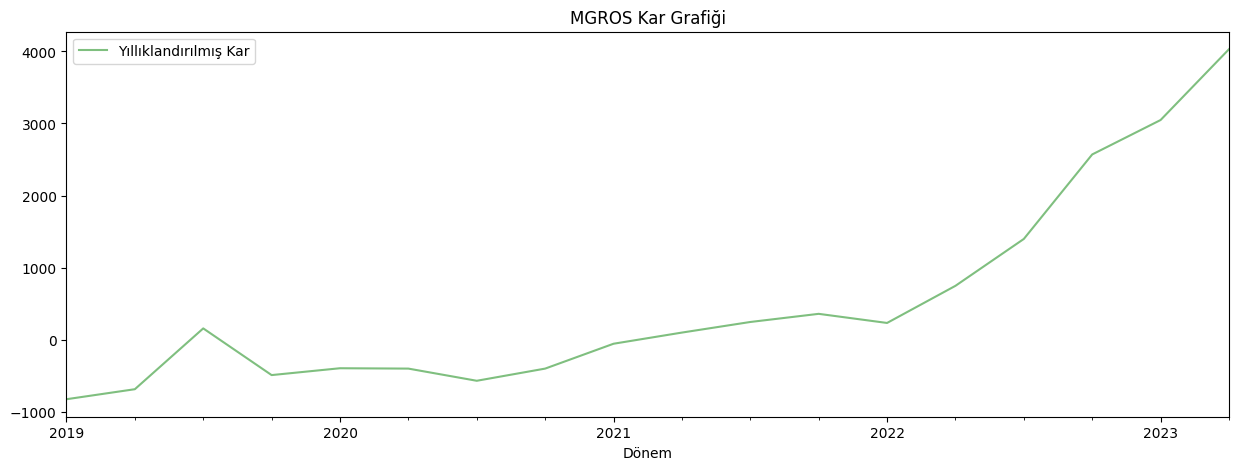

In [17]:
df.plot(kind="line",figsize=(15,5),title="MGROS Kar Grafiği",color="green",alpha=0.5)

In [18]:
fiyat=pd.DataFrame()
dönem=pd.date_range(start="2019-03-31",end="2023-10-01",freq="Q")
fiyat["Fiyat"]=mgros["Close"].resample("Q").last()



# Güncellenmiş DataFrame'i gösterelim
fiyat

,Fiyat
Date,
2019-03-31,13.570000
2019-06-30,13.520000
2019-09-30,20.780001
2019-12-31,24.299999
2020-03-31,22.680000
2020-06-30,38.500000
2020-09-30,41.000000
2020-12-31,42.759998
2021-03-31,35.000000


In [19]:
df1=pd.DataFrame(fiyat)
df1["Dönem"]=pd.date_range(start="2019-03-31",end="2023-07-01",freq="Q")
df1["Ödenmiş Sermaye"]=181.054
df1["Özkaynak"]=[411.3,265.4,455.2,322.8,161.8,52.5,98.4,33.4,34,15,170.5,536,660.3,1222.6,2032,4089.75,4741.9,5963.42]
df1["Duran Varlıklar"]=[13598,14274,14415,14460,14748,15089,15137,15378,14476,14960,16224,18100,20609,23964,28445,36423,40343,46828]
df1["Dönen Varlıklar"]=[4400,5000,5120,5270,5880,6340,6750,7330,6450,6800,7760,8700,1100,1358,1719,2012,2300,2824]
df1["Kısa Vadeli Yükümlülükler"]=[6695,7416,7447,7544,8018,8975,9401,10402,10226,10876,11818,13108,15017,17969,21252,26010,29698,34142]
df1["Uzun Vadeli Yükümlülükler"]=[6491,6592,6512,6593,6568,6060,5637,4941,4215,4069,4236,4455,4931,4772,5160,6323,5902,6722]
df1["Toplam Yükümlülük"]=df1["Kısa Vadeli Yükümlülükler"]+df1["Uzun Vadeli Yükümlülükler"]
df1["Çeyreklik Kar"]=[-230.8,-150.4,178.8,-289.5,-136.2,-154.4,9,-121.3,209.5,1.7,155.9,-8.3,82.4,520.4,812,1165,565,1515]
df1["HBK"]=df["Yıllıklandırılmış Kar"]/df1["Ödenmiş Sermaye"]
df1["Toplam Varlıklar"]=df1["Duran Varlıklar"]+df1["Dönen Varlıklar"]





In [20]:
X=df1[["Ödenmiş Sermaye","Özkaynak","Toplam Varlıklar","Toplam Yükümlülük","Çeyreklik Kar","HBK","Dönen Varlıklar","Duran Varlıklar","Kısa Vadeli Yükümlülükler","Uzun Vadeli Yükümlülükler"]]
y=df1["Fiyat"]

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# PCA uygulama
pca = PCA(n_components=2)  # 10 ana bileşen seç, bu sayıyı değiştirebilirsin
principal_components = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.8002032 , 0.11699175])

In [22]:
X=principal_components
y=df1["Fiyat"]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
import pandas as pd
import statsmodels.api as sm

# Verileri yükleyin ve ön işleme yapın

# Modeli eğitin

# Özellikleri sabit terim ekleyerek modeli yeniden eğitin

results = model.fit(X_train, y_train)

# Modelin özetini görüntüleyin
results.score(X_train,y_train)

0.9689355784369215

In [25]:
tahmin1=pd.DataFrame(results.predict(X_test),columns=["Tahmin"],index=y_test.index)
tahmin1["Gerçek"]=y_test
tahmin1=tahmin1.sort_index()
tahmin1

,Tahmin,Gerçek
Date,,
2019-03-31,15.931697,13.570000
2019-06-30,19.387640,13.520000
2019-12-31,18.938427,24.299999
2020-06-30,23.214176,38.500000
2021-03-31,31.867039,35.000000
2022-06-30,82.364463,48.000000
2022-12-31,151.395786,146.500000
2023-03-31,161.125539,167.500000


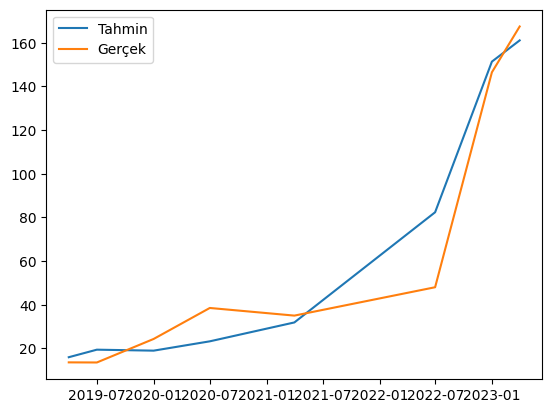

In [26]:
import matplotlib.pyplot as plt
plt.plot(tahmin1["Tahmin"],label="Tahmin")
plt.plot(tahmin1["Gerçek"],label="Gerçek")
plt.legend()

In [27]:
X=df1[["Ödenmiş Sermaye","Özkaynak","Toplam Yükümlülük","Çeyreklik Kar","HBK","Kısa Vadeli Yükümlülükler","Uzun Vadeli Yükümlülükler"]]
y=df1["Fiyat"]

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np


# Tahminleri saklamak için bir liste
predictions = []

# Her bir sütun için döngü
for i in range(0, 7):  # 1'den 18'e kadar (18 dahil)
    # SARIMAX modelini oluşturma
    sarimax_model = SARIMAX(X.iloc[:, i], 
                            order=(1, 1, 1), 
                            seasonal_order=(1, 1, 1, 4))  # Çeyreklik veri için mevsimsel periyot 4

    # Modeli eğitme
    sarimax_fit = sarimax_model.fit(disp=False)

    # Modelin özeti (isteğe bağlı)
    print(sarimax_fit.summary())

    # Gelecekteki 5 değeri tahmin etme
    future_predictions = sarimax_fit.get_forecast(steps=6).predicted_mean

    # Tahminleri listeye ekleme
    predictions.append(future_predictions)

# Tahminleri bir DataFrame'e dönüştürme
predictions_df = pd.DataFrame(predictions).T  # Transpoze alarak sütunlarla satırları ters çeviriyoruz
predictions_df.columns = X.columns  # Sütun adlarını X DataFrame'inden alıyoruz


extended_X = pd.concat([X, predictions_df], ignore_index=True)



c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregress

                                     SARIMAX Results                                     
Dep. Variable:                   Ödenmiş Sermaye   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 149.467
Date:                           Sun, 01 Oct 2023   AIC                           -288.934
Time:                                   00:14:45   BIC                           -286.109
Sample:                               03-31-2019   HQIC                          -289.515
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                 Toplam Yükümlülük   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -111.309
Date:                           Sun, 01 Oct 2023   AIC                            232.618
Time:                                   00:14:45   BIC                            235.443
Sample:                               03-31-2019   HQIC                           232.037
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.218      4.594      0.000       0.573       1.427
ma.L1         -0.7280      0.310     -2.348

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                               HBK   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -32.080
Date:                           Sun, 01 Oct 2023   AIC                             74.161
Time:                                   00:14:46   BIC                             76.986
Sample:                               03-31-2019   HQIC                            73.580
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7936      1.731      0.458      0.647      -2.599       4.186
ma.L1         -0.5351      1.889     -0.283

c:\Users\Bora\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                     
Dep. Variable:         Uzun Vadeli Yükümlülükler   No. Observations:                   18
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                -103.043
Date:                           Sun, 01 Oct 2023   AIC                            216.086
Time:                                   00:14:46   BIC                            218.911
Sample:                               03-31-2019   HQIC                           215.505
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7253      0.570      1.273      0.203      -0.392       1.842
ma.L1         -0.4899      0.719     -0.682

In [29]:
extended_X=extended_X.set_index(pd.date_range(start="2019-03-31",end="2025-01-01",freq="Q"))
extended_X

,Ödenmiş Sermaye,Özkaynak,Toplam Yükümlülük,Çeyreklik Kar,HBK,Kısa Vadeli Yükümlülükler,Uzun Vadeli Yükümlülükler
2019-03-31,181.054,411.300000,13186.000000,-230.800000,-4.567698,6695.000000,6491.000000
2019-06-30,181.054,265.400000,14008.000000,-150.400000,-3.799971,7416.000000,6592.000000
2019-09-30,181.054,455.200000,13959.000000,178.800000,0.861621,7447.000000,6512.000000
2019-12-31,181.054,322.800000,14137.000000,-289.500000,-2.717421,7544.000000,6593.000000
2020-03-31,181.054,161.800000,14586.000000,-136.200000,-2.192716,8018.000000,6568.000000
2020-06-30,181.054,52.500000,15035.000000,-154.400000,-2.220332,8975.000000,6060.000000
2020-09-30,181.054,98.400000,15038.000000,9.000000,-3.153755,9401.000000,5637.000000
2020-12-31,181.054,33.400000,15343.000000,-121.300000,-2.220332,10402.000000,4941.000000
2021-03-31,181.054,34.000000,14441.000000,209.500000,-0.314823,10226.000000,4215.000000
2021-06-30,181.054,15.000000,14945.000000,1.700000,0.541275,10876.000000,4069.000000


In [30]:
tes=ExponentialSmoothing(X["Çeyreklik Kar"],trend="add",seasonal="add",seasonal_periods=4)
model=tes.fit(smoothing_level=0.9,smoothing_slope=0.9,smoothing_seasonal=0.9)
tahmin2=model.forecast(6)
tahmin2


NameError: name 'ExponentialSmoothing' is not defined

In [31]:
extended_X.iloc[-6::,4]=tahmin2
extended_X

NameError: name 'tahmin2' is not defined

In [32]:


# Veri ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(extended_X)

# PCA uygulama
pca = PCA(n_components=2)  # 10 ana bileşen seç, bu sayıyı değiştirebilirsin
principal_components1 = pca.fit_transform(scaled_data)

# Varyansı kontrol et
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.936078  , 0.04728084])

In [33]:
y=df1["Fiyat"]
y.loc[pd.Timestamp('2023-09-30')] = 365
y

Date
2019-03-31     13.570000
2019-06-30     13.520000
2019-09-30     20.780001
2019-12-31     24.299999
2020-03-31     22.680000
2020-06-30     38.500000
2020-09-30     41.000000
2020-12-31     42.759998
2021-03-31     35.000000
2021-06-30     32.500000
2021-09-30     31.520000
2021-12-31     37.939999
2022-03-31     45.680000
2022-06-30     48.000000
2022-09-30    101.199997
2022-12-31    146.500000
2023-03-31    167.500000
2023-06-30    212.600006
2023-09-30    365.000000
Freq: Q-DEC, Name: Fiyat, dtype: float64

In [34]:
model=LinearRegression()
model.fit(principal_components1[:19],y)
model.score(principal_components1[:19],y)

0.907913363361935

In [35]:
tahmin3=pd.DataFrame(model.predict(principal_components1),index=pd.date_range(start="2019-03-31",end="2025-01-01",freq="Q"),columns=["Tahmin"])
tahmin3

,Tahmin
2019-03-31,17.484506
2019-06-30,25.075352
2019-09-30,46.871476
2019-12-31,22.118262
2020-03-31,29.640515
2020-06-30,24.334013
2020-09-30,24.988966
2020-12-31,14.674335
2021-03-31,21.045158
2021-06-30,14.130634


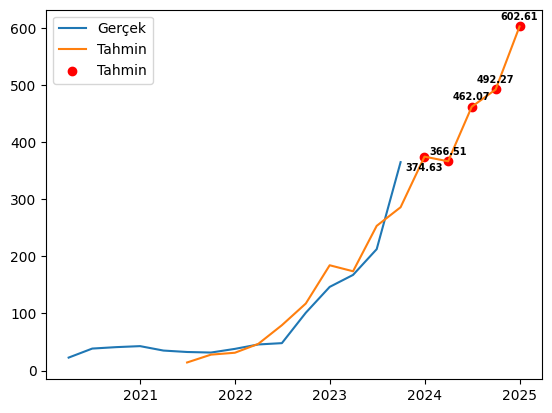

In [44]:
plt.plot(y.tail(15),label="Gerçek")
plt.plot(tahmin3.tail(15),label="Tahmin")
plt.scatter(tahmin3.index[-5::],tahmin3["Tahmin"][-5::],label="Tahmin",color="red")
for i in range(-4,0):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,5), ha='center',weight="bold",fontsize=7)
for i in range(-5,-4):
    plt.annotate(str(round(tahmin3["Tahmin"][i],2)), (tahmin3.index[i], tahmin3["Tahmin"][i]), textcoords="offset points", xytext=(0,-10), ha='center',weight="bold",fontsize=7)

plt.legend()